# 1. Importing the libraries

In [1]:


# Importing all the required libraries
import numpy as np 
import pandas as pd 
import os
import itertools

#plots
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from PIL import Image
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from nltk.util import ngrams


import re
from collections import Counter

import nltk
from nltk.corpus import stopwords

import requests
import json

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})


import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt




# 2. Loading the dataset

In [2]:
# Using the above names we can import the test and train data to start the EDA and Sentiment Analysis
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.shape

(568454, 10)

# 3. Data cleaning

In [4]:
# checking the shape of the train and test datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
# checking null values in train and test data

df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [6]:
# dropping null values in train and test data

df = df.dropna()

In [7]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [8]:
# checking for duplicates
df.duplicated().sum()

0

# 4. Exploratory Data Analysis

In [9]:
#Checking the spread of sentiment data
df.Score.value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

In [10]:
# checking the spread of sentiment data in  the dataset 

rating_pct = df['Score'].value_counts()/len(df) * 100
rating_pct

5    63.881769
4    14.189557
1     9.194755
3     7.501262
2     5.232657
Name: Score, dtype: float64

C:\Users\Anshavik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countplot for Score')

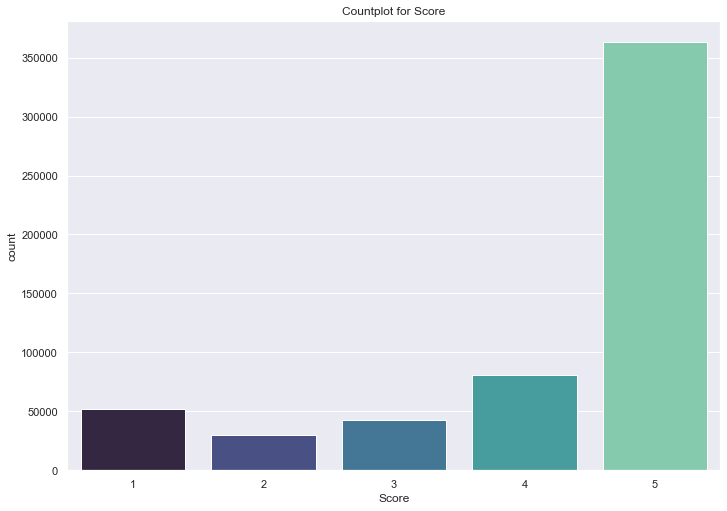

In [11]:
sns.countplot(df.Score, palette='mako')
plt.title('Countplot for Score')

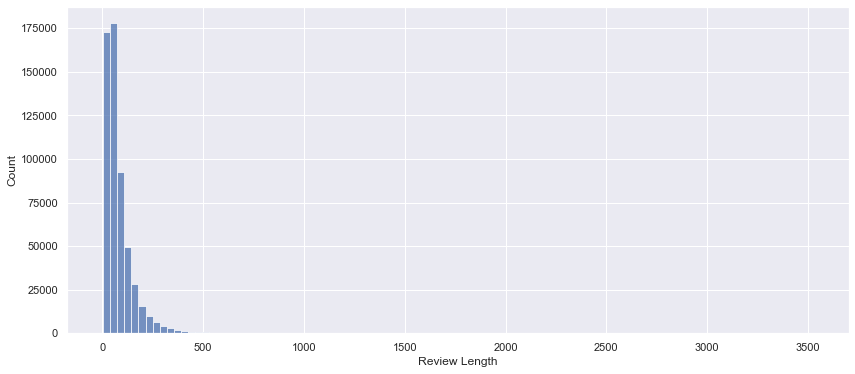

In [12]:
#words per review
plt.figure(figsize = (14,6))
WordsPerReview = df['Text'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 100)

plt.xlabel('Review Length')
plt.show()

### Creating a wordcloud to check the words in the reviews

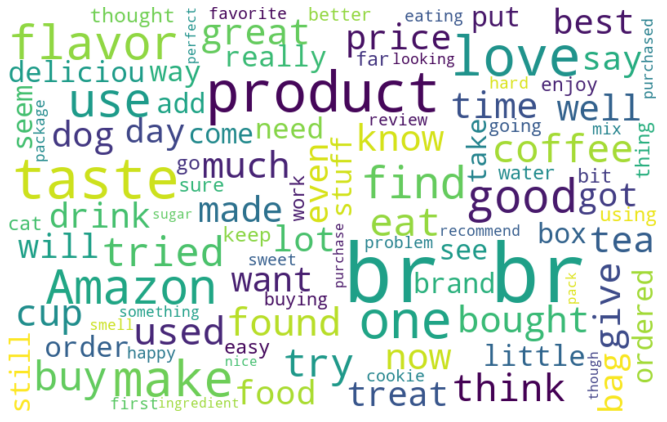

In [13]:
txt = ' '.join(review for review in df.Text)

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

# 5. Processing data for NLP analysis

In [14]:
df = pd.DataFrame(df,columns = ['Score','Text','Id'])
df.rename(columns = {'Score':'Rating','Text':'Review','Id':'Id'},inplace = True)

In [15]:
def apply_sentiment(Rating):
    if(Rating <=2 ):
        return 0
    else:
        return 1

In [16]:
df['Sentiment'] = df['Rating'].apply(apply_sentiment)
df.drop(['Rating'],axis = 1, inplace = True)

In [17]:
sentiment = df['Sentiment'].value_counts()
sentiment

1    486404
0     82007
Name: Sentiment, dtype: int64

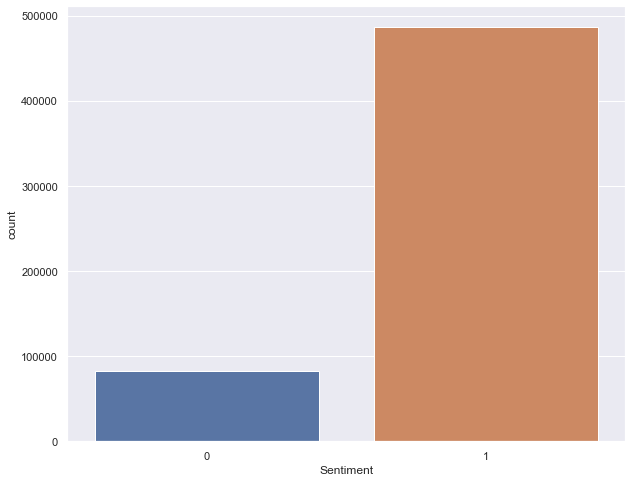

In [18]:
plt.figure(figsize = ( 10,8))
sns.countplot(data = df, x = 'Sentiment')
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Review     568411 non-null  object
 1   Id         568411 non-null  int64 
 2   Sentiment  568411 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 33.5+ MB


# 6. Applying nltk sentiment analysis to the dataset

In [21]:
import nltk

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Anshavik\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [24]:
sid = SentimentIntensityAnalyzer()

In [26]:
X = df.drop('Sentiment',axis=1)
y = df.Sentiment

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [28]:
X_test_nlp = X_test

In [29]:
X_test_nlp['scores'] = X_test_nlp['Review'].apply(lambda x: sid.polarity_scores(x))

In [30]:
X_test_nlp.head(1)

,Review,Id,scores
511467,"I First bought when I got my cat, then she lea...",511468,"{'neg': 0.079, 'neu': 0.748, 'pos': 0.173, 'co..."


In [31]:
X_test_nlp['compound'] = X_test_nlp['scores'].apply(lambda d: d['compound'])

In [33]:
X_test_nlp.head()

,Review,Id,scores,compound
511467,"I First bought when I got my cat, then she lea...",511468,"{'neg': 0.079, 'neu': 0.748, 'pos': 0.173, 'co...",0.8708
153511,My little girl Dasiey (dog) loves this treats....,153512,"{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'comp...",0.9349
222482,This is a great way to get a quick iced tea-li...,222483,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.8999
491530,Let it be known that I love sunflower seeds. ...,491531,"{'neg': 0.043, 'neu': 0.867, 'pos': 0.09, 'com...",0.8106
199288,Bolder ginger taste would earn a five stars ha...,199289,"{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'comp...",0.1531


In [34]:
X_test_nlp['comp_score'] = X_test_nlp['compound'].apply(lambda score: 1 if score>=0 else 0)

In [35]:
predict_nlp = X_test_nlp['comp_score']

In [36]:
predict_nlp[:5]

511467    1
153511    1
222482    1
491530    1
199288    1
Name: comp_score, dtype: int64

In [37]:
y_test[:5]

511467    1
153511    1
222482    1
491530    0
199288    1
Name: Sentiment, dtype: int64

In [38]:
print('Classification report: \n',classification_report(y_test,predict_nlp))

Classification report: 
               precision    recall  f1-score   support

           0       0.55      0.41      0.47     24602
           1       0.91      0.94      0.92    145922

    accuracy                           0.87    170524
   macro avg       0.73      0.68      0.70    170524
weighted avg       0.85      0.87      0.86    170524



## As we can see that the above dataset is highly imbalanced. We have got a high accuracy of 87% but the other metrics like precision, recall and f1-score for the negative sentiment class are very less. 
## Now let us balance the dataset to see if this improves the overall model. 

# 7. Balancing the dataset by using imblearn

In [39]:
# import library
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [40]:
# trying under sampling first
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))
print('original dataset shape:', Counter(X))
print('Resample dataset shape', Counter(x_rus))

original dataset shape: Counter({1: 486404, 0: 82007})
Resample dataset shape Counter({0: 82007, 1: 82007})
original dataset shape: Counter({'Review': 1, 'Id': 1})
Resample dataset shape Counter({'Review': 1, 'Id': 1})


In [41]:
x_rus.shape

(164014, 2)

In [44]:
y_rus.value_counts()

0    82007
1    82007
Name: Sentiment, dtype: int64

# 8. re applying the nltk sentiment analysis to the balanced dataset if it improves the accuracy

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_rus,y_rus,test_size=0.25,random_state=0,stratify=y_rus)

In [52]:
X_test_nlp = X_test

In [53]:
X_test['Review'].head()

145207    why are they trying to charge people   times t...
39943     just bought this product for the first time an...
74181     reminds me of weak diner coffee   has a slight...
99827     chana dal is one of the most healthful legumes...
87946     china mist tea is so refreshing iced  the mix ...
Name: Review, dtype: object

In [54]:
X_test_nlp['scores'] = X_test_nlp['Review'].apply(lambda x: sid.polarity_scores(x))

In [55]:
X_test_nlp.head(1)

,Review,Id,scores
145207,why are they trying to charge people times t...,221727,"{'neg': 0.053, 'neu': 0.911, 'pos': 0.036, 'co..."


In [56]:
X_test_nlp['compound'] = X_test_nlp['scores'].apply(lambda d: d['compound'])

In [57]:
X_test_nlp.head()

,Review,Id,scores,compound
145207,why are they trying to charge people times t...,221727,"{'neg': 0.053, 'neu': 0.911, 'pos': 0.036, 'co...",-0.2023
39943,just bought this product for the first time an...,274831,"{'neg': 0.094, 'neu': 0.786, 'pos': 0.12, 'com...",0.4195
74181,reminds me of weak diner coffee has a slight...,510741,"{'neg': 0.183, 'neu': 0.817, 'pos': 0.0, 'comp...",-0.6810
99827,chana dal is one of the most healthful legumes...,230829,"{'neg': 0.05, 'neu': 0.894, 'pos': 0.056, 'com...",0.0790
87946,china mist tea is so refreshing iced the mix ...,325963,"{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'comp...",0.8834


In [58]:
X_test_nlp['comp_score'] = X_test_nlp['compound'].apply(lambda score: 1 if score>=0 else 0)

In [59]:
predict_nlp = X_test_nlp['comp_score']

In [60]:
predict_nlp[:5]

145207    0
39943     1
74181     0
99827     1
87946     1
Name: comp_score, dtype: int64

In [61]:
y_test[:5]

145207    1
39943     0
74181     0
99827     1
87946     1
Name: Sentiment, dtype: int64

In [62]:
print('Classification report: \n',classification_report(y_test,predict_nlp))

Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.42      0.57     20502
           1       0.62      0.95      0.75     20502

    accuracy                           0.68     41004
   macro avg       0.75      0.68      0.66     41004
weighted avg       0.75      0.68      0.66     41004



## The overall accuracy of the model has reduced but the precision, recall and f1-scores of the model have slightly increased. 
## Now let us try to use Neural Networks to try to do the sentiment analysis

# 9. Creating Neural network for the Sentiment Analysis

In [64]:
df1 = x_rus

In [63]:
# creating a function to remove all unnecessary characters from the text

def clean_text(df, field):
    df[field] = df[field].str.replace(r'@',' at ')
    df[field] = df[field].str.replace('#[^a-zA-Z0-9_]+',' ')
    df[field] = df[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    df[field] = df[field].str.replace(r'http\S+','')
    df[field] = df[field].str.lower()
    return df

In [65]:
# applying the function to clean training dataset
clean_text(df1,'Review')

C:\Users\Anshavik\AppData\Local\Temp/ipykernel_16400/4099916899.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[field] = df[field].str.replace('#[^a-zA-Z0-9_]+',' ')
C:\Users\Anshavik\AppData\Local\Temp/ipykernel_16400/4099916899.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df[field] = df[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
C:\Users\Anshavik\AppData\Local\Temp/ipykernel_16400/4099916899.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df[field] = df[field].str.replace(r'http\S+','')


,Review,Id
0,product arrived labeled as jumbo salted peanut...,2
1,if you are looking for the secret ingredient i...,4
2,my cats have been happily eating felidae plati...,13
3,i love eating them and they are good for watch...,17
4,"the candy is just red , no flavor just plan...",27
...,...,...
164009,i like these ok they are convenient and tast...,465231
164010,i wish to correct my review of the on line can...,310767
164011,most reviewers seem to agree the quality of th...,461139
164012,"my dog loves, loves this dog food i had to sa...",402933


In [66]:
# Importing the nltk related libraries for applying nlp related tasks
import nltk
import re
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [67]:
lemmatizer = WordNetLemmatizer()

# creating a function to remove punctuations

def remove_punctuations(data):
    punct_tag = re.compile(r'[^\w\s]')
    data = punct_tag.sub(r'', data)
    return data

In [68]:
# creating a function to remove HTML syntaxes
def remove_html(data):
    html_tag = re.compile(r'<.*?>')
    data = html_tag.sub(r'',data)
    return data


In [69]:
# creating a function to remove url data
def remove_url(data):
    url_clean = re.compile(r"https://\S+|www\. \S+")
    data = url_clean.sub(r'',data)
    return data

In [70]:
# function to remove emojis data
def remove_emoji(data):
    emoji_clean = re.compile("[" 
                             u"\U0001F600-\U0001F64F"  # emoticons
                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             u"\U00002702-\U000027B0" 
                             u"\U000024C2-\U0001F251"
                             "]+",flags=re.UNICODE)
    data = emoji_clean.sub(r'',data)
    url_clean = re.compile(r"https://|S+|www\. \S+")
    data = url_clean.sub(r'',data)
    return data

In [71]:
# applying the above functions to train data

df1['review_clean'] = df1['Review'].apply(lambda x: remove_punctuations(x))

In [72]:
df1['row_num'] = list(df1.index)


In [73]:
# function to Lemmatize the data

#def lemmatize_text(data):
 #   count = data['row_num']
  #  print(f" Count -> {count}")
  #  out_data = ""
  #  for words in data['text_clean']:
  #      out_data+= lemmatizer.lemmatize(words)
  #     # count =""
        
  #  return out_data


def lemmatize_text(data):
    index = data['row_num']
    out_data=""
    if index%50000==0:
        print(f"The progress is {index}")
    
    for words in data['review_clean_sw']:
        
        out_data+= lemmatizer.lemmatize(words)
        
        
    return out_data


In [74]:
df1.head(1)

,Review,Id,review_clean,row_num
0,product arrived labeled as jumbo salted peanut...,2,product arrived labeled as jumbo salted peanut...,0


In [75]:
stop = stopwords.words('english')

In [76]:
df1['review_clean_sw'] = df1['review_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [78]:
df1.head()

,Review,Id,review_clean,row_num,review_clean_sw
0,product arrived labeled as jumbo salted peanut...,2,product arrived labeled as jumbo salted peanut...,0,product arrived labeled jumbo salted peanuts p...
1,if you are looking for the secret ingredient i...,4,if you are looking for the secret ingredient i...,1,looking secret ingredient robitussin believe f...
2,my cats have been happily eating felidae plati...,13,my cats have been happily eating felidae plati...,2,cats happily eating felidae platinum two years...
3,i love eating them and they are good for watch...,17,i love eating them and they are good for watch...,3,love eating good watching tv looking movies sw...
4,"the candy is just red , no flavor just plan...",27,the candy is just red no flavor just plan ...,4,candy red flavor plan chewy would never buy


In [80]:
df2 = df1.apply(lemmatize_text, axis=1)

The progress is 0
The progress is 50000
The progress is 100000
The progress is 150000


In [81]:
# Since lemmatizing the training dataset has been taking a lot of time. 
# I have written the lemmatized version of the training dataset into a csv file

df2.to_csv('lemmatized_df1_dataset.csv')

In [89]:
df1['review_clean_sw'] = df2

In [90]:
df1.head()

,Review,Id,review_clean,row_num,review_clean_sw
0,product arrived labeled as jumbo salted peanut...,2,product arrived labeled as jumbo salted peanut...,0,product arrived labeled jumbo salted peanuts p...
1,if you are looking for the secret ingredient i...,4,if you are looking for the secret ingredient i...,1,looking secret ingredient robitussin believe f...
2,my cats have been happily eating felidae plati...,13,my cats have been happily eating felidae plati...,2,cats happily eating felidae platinum two years...
3,i love eating them and they are good for watch...,17,i love eating them and they are good for watch...,3,love eating good watching tv looking movies sw...
4,"the candy is just red , no flavor just plan...",27,the candy is just red no flavor just plan ...,4,candy red flavor plan chewy would never buy


In [92]:
X = df1.drop(['Review','Id','review_clean','row_num'],axis=1)
y = y_rus

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164014 entries, 0 to 164013
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   review_clean_sw  164014 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


In [94]:
y.info()

AttributeError: 'Series' object has no attribute 'info'

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [96]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(114809, 1)
(49205, 1)
(114809,)
(49205,)


In [97]:
y_train.value_counts()

1    57405
0    57404
Name: Sentiment, dtype: int64

In [98]:
y_test.value_counts()

0    24603
1    24602
Name: Sentiment, dtype: int64

In [99]:
# Calculating the vocab size
def get_vocab_size(self, namespace='words'):
    return len(self.word_indices[namespace])

In [100]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [102]:
vocab_size = 8000
embedding_dim = 32
max_length = 100
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train['review_clean_sw'])
word_index = tokenizer.word_index
V = len(word_index)
print(V)

59315


In [103]:
# using tokenizer to transform text messages into training and testing set
X_train_seq = tokenizer.texts_to_sequences(X_train['review_clean_sw'])
X_test_seq = tokenizer.texts_to_sequences(X_test['review_clean_sw'])

In [104]:
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='pre',truncating='pre')
X_test_seq_padded = pad_sequences(X_test_seq, maxlen = max_length, padding='pre',truncating='pre')



In [105]:
print('train padded',X_train_seq_padded.shape)
print('test padded',X_test_seq_padded.shape)

train padded (114809, 100)
test padded (49205, 100)


In [106]:
X_train_seq_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0, 2352,    1,
          1,  932, 2058, 1823,    1,    1,  139,  570, 2534,  409,  315,
         32])

In [107]:
# Creating an RNN Network - with just 1 output in the outer layer
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model1 = keras.Sequential()
model1.add(layers.Embedding(len(word_index),embedding_dim,input_length=max_length ))
model1.add(layers.SimpleRNN(32))
model1.add(layers.Dense(1,activation='sigmoid'))
model1.summary()


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.01,
    decay_steps=10000,
    decay_rate=0.95,
    staircase=True
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           1898080   
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,900,193
Trainable params: 1,900,193
Non-trainable params: 0
_________________________________________________________________


In [108]:
# Compiling the model
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [109]:
# Fitting the model
history1 = model1.fit(X_train_seq_padded, y_train, batch_size=32,epochs=10)


Epoch 1/10
3588/3588 [==============================] - 138s 38ms/step - loss: 0.3865 - accuracy: 0.8283
Epoch 2/10
3588/3588 [==============================] - 136s 38ms/step - loss: 0.2895 - accuracy: 0.8861
Epoch 3/10
3588/3588 [==============================] - 135s 38ms/step - loss: 0.2520 - accuracy: 0.9032
Epoch 4/10
3588/3588 [==============================] - 135s 38ms/step - loss: 0.2104 - accuracy: 0.9215
Epoch 5/10
3588/3588 [==============================] - 138s 38ms/step - loss: 0.1763 - accuracy: 0.9358
Epoch 6/10
3588/3588 [==============================] - 137s 38ms/step - loss: 0.1590 - accuracy: 0.9414
Epoch 7/10
3588/3588 [==============================] - 132s 37ms/step - loss: 0.1207 - accuracy: 0.9579
Epoch 8/10
3588/3588 [==============================] - 135s 38ms/step - loss: 0.1145 - accuracy: 0.9591
Epoch 9/10
3588/3588 [==============================] - 135s 38ms/step - loss: 0.0839 - accuracy: 0.9720
Epoch 10/10
3588/3588 [==============================] 

In [110]:
# Predicting using the model
predict1 = model1.predict(X_test_seq_padded)

In [111]:
model1.evaluate(X_test_seq_padded, y_test)

1538/1538 [==============================] - 11s 7ms/step - loss: 0.5248 - accuracy: 0.8696


[0.5248458981513977, 0.8696473836898804]

In [112]:
predict1[:10]

array([[3.8144886e-03],
       [9.5682698e-01],
       [8.8348883e-01],
       [9.9976963e-01],
       [7.1827769e-03],
       [9.8163950e-01],
       [2.3451447e-04],
       [9.9061936e-01],
       [9.9991679e-01],
       [9.7956288e-01]], dtype=float32)

In [113]:
y_test[:10]

41109     0
10045     0
139587    1
114030    1
101843    1
152444    1
50565     0
135339    1
158308    1
149707    1
Name: Sentiment, dtype: int64

In [114]:
#y_pred = ['0' if x < 0.5 else '1' for x in y_pred_prob]
predict2_class = [0 if x<0.2 else 1 for x in predict1]        

In [115]:
predict2_class[:10]

[0, 1, 1, 1, 0, 1, 0, 1, 1, 1]

In [122]:
y_test[10:11]

151751    1
Name: Sentiment, dtype: int64

In [117]:
X_test_seq_padded[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,  138, 2469,  718,    3, 7559, 7304,  633,  416,
       2979,   10, 1242,    3,   45,   32,   56,  433,  327,  762,  165,
          1,    1, 2137,  148,  992,  671,  230,  421,  346, 5015,  110,
        250,  835,  304,  250, 4190,  462,   37,    1,    1,  193,   20,
         26])

In [119]:
X_test['review_clean_sw'][10]

'tea flavor whole brunch artifial flavors returnable wasted bucks'

In [123]:
predict1[10]

array([0.00174311], dtype=float32)

In [124]:
y_test[:10]

41109     0
10045     0
139587    1
114030    1
101843    1
152444    1
50565     0
135339    1
158308    1
149707    1
Name: Sentiment, dtype: int64

In [125]:
print('Classification report: \n',classification_report(y_test,predict2_class))

Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.81      0.85     24603
           1       0.83      0.91      0.87     24602

    accuracy                           0.86     49205
   macro avg       0.86      0.86      0.86     49205
weighted avg       0.86      0.86      0.86     49205



In [ ]:
# Conclusion: 